# Classification Vert

Dans cette seconde partie du TP, nous utiliserons un algorithme Random Forest pour réaffecter les individus dans les groupes tout en minimisant le nombre de variables utilisées (Golden questions). Ce notebook concerne l'utilisation des variables vertes.

## Setup

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
n_estimators = 1000

data = pd.read_csv("../data/vert.csv")
data = data.drop(columns=["Respondent_ID"])
data


,cle,weight,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,...,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,cluster
0,1,2.501255,1,0,0,0,1,2.0,0.0,2,...,2,2,2,2,2,2,2,2,2,3
1,2,0.722914,1,0,0,0,1,5.0,0.0,2,...,4,4,4,4,4,4,4,4,4,1
2,3,1.039611,1,0,0,0,1,2.0,0.0,5,...,4,4,4,4,4,4,4,4,4,1
3,4,0.976590,1,1,1,0,1,1.0,0.0,2,...,4,4,5,5,5,5,5,4,4,4
4,5,0.812315,0,1,0,0,2,0.0,1.0,1,...,4,4,4,4,4,4,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.905997,1,0,1,0,3,0.0,1.0,5,...,4,4,5,5,5,5,5,4,5,2
4996,4997,1.257884,0,1,0,0,2,0.0,1.0,1,...,4,5,5,5,5,5,5,5,5,2
4997,4998,1.094695,0,1,0,0,2,0.0,2.0,1,...,5,5,5,5,5,5,5,5,5,2
4998,4999,2.022023,0,0,1,0,3,0.0,1.0,1,...,5,4,5,5,5,5,5,5,5,2


In [4]:
data.dtypes


cle             int64
weight        float64
A11             int64
A12             int64
A13             int64
A14             int64
A4              int64
A5            float64
A5bis         float64
A8_1_slice      int64
A8_2_slice      int64
A8_3_slice      int64
A8_4_slice      int64
B1_1_slice      int64
B1_2_slice      int64
B2_1_slice      int64
B2_2_slice      int64
B3              int64
B4              int64
B6              int64
C1_1_slice      int64
C1_2_slice      int64
C1_3_slice      int64
C1_4_slice      int64
C1_5_slice      int64
C1_6_slice      int64
C1_7_slice      int64
C1_8_slice      int64
C1_9_slice      int64
cluster         int64
dtype: object

## Entraînement de la Random Forest

In [5]:
X = data.drop(columns=['cluster'])
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

print(len(X_train), len(X_test))

3500 1500


In [6]:
rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=23)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=23)

## Evaluer la Random Forest

In [7]:
y_pred = rf_model.predict(X_test)


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9373333333333334
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       122
           1       0.92      0.86      0.89       367
           2       0.96      0.99      0.98       381
           3       0.93      0.93      0.93        89
           4       0.93      0.97      0.95       541

    accuracy                           0.94      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.94      0.94      0.94      1500



## Identifier les variables importantes

In [9]:
feature_importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
8,A5bis,0.089756
6,A4,0.086795
7,A5,0.086238
28,C1_9_slice,0.057642
9,A8_1_slice,0.047311
2,A11,0.047300
11,A8_3_slice,0.046286
27,C1_8_slice,0.044802
20,C1_1_slice,0.044491
26,C1_7_slice,0.044401


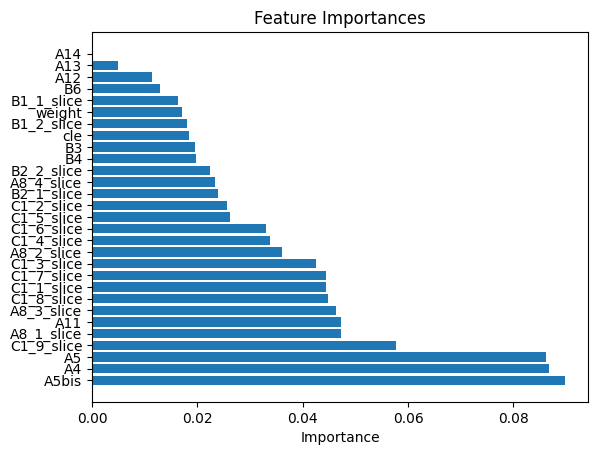

In [10]:
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


## Minimiser les variables

In [12]:
num_golden = range(39, 0, -1)
accuracies = []

for i in num_golden:
    selected_features = importance_df['Feature'].head(i).tolist()
    
    X_train_reduced = X_train[selected_features]
    X_test_reduced = X_test[selected_features]
    
    rf_model_reduced = RandomForestClassifier(n_estimators=n_estimators, random_state=23)
    rf_model_reduced.fit(X_train_reduced, y_train)
    
    y_reduced_pred = rf_model_reduced.predict(X_test_reduced)
    accuracies.append(accuracy_score(y_test, y_reduced_pred))


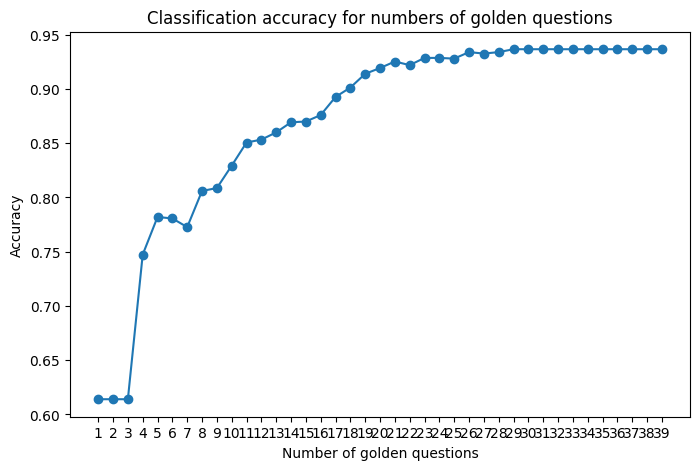

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(num_golden, accuracies, marker='o')
plt.title("Classification accuracy for numbers of golden questions")
plt.xlabel("Number of golden questions")
plt.ylabel("Accuracy")
plt.xticks(num_golden)
plt.show()


On se rend compte que l'accuracy augmente très sensiblement à partir de 17 golden questions. On remarque aussi qu'elle n'augmente quasiment plus a-delà de 29 golden questions. On peut donc se concentrer sur l'intervalle [17, 29] pour trouver le nombre optimal de golden questions

In [15]:
num_golden = range(17, 29)
accuracies = {0: [], 1: [], 2: [], 3: []}

for i in num_golden:
    selected_features = importance_df['Feature'].head(i).tolist()
    
    X_train_reduced = X_train[selected_features]
    X_test_reduced = X_test[selected_features]
    
    rf_model_reduced = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model_reduced.fit(X_train_reduced, y_train)
    
    y_reduced_pred = rf_model_reduced.predict(X_test_reduced)
    report = classification_report(y_test, y_reduced_pred, output_dict=True)
    
    accuracies[0].append(report['0']['precision'])
    accuracies[1].append(report['1']['precision'])
    accuracies[2].append(report['2']['precision'])
    accuracies[3].append(report['3']['precision'])


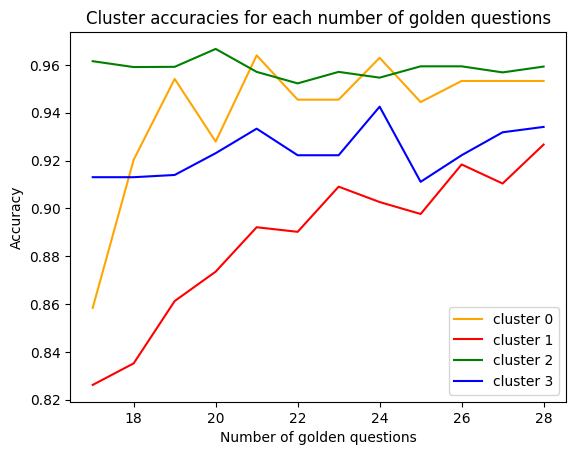

In [16]:
# Tracer les courbes
plt.plot(num_golden, accuracies[0], label="cluster 0", color="orange")
plt.plot(num_golden, accuracies[1], label="cluster 1", color="red")
plt.plot(num_golden, accuracies[2], label="cluster 2", color="green")
plt.plot(num_golden, accuracies[3], label="cluster 3", color="blue")

# Ajouter des légendes
plt.title("Cluster accuracies for each number of golden questions")
plt.xlabel("Number of golden questions")
plt.ylabel("Accuracy")
plt.legend()


On se rend compte que la précisions sur chaque cluster augmente de manière négligeable à partir de 21 golden questions. De ce fait, nous sélectionnerons la valeur 21 comme nombre de golden questions dans cette enquête.